In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
sns.set(style="ticks")

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as grd
import matplotlib.ticker as tkr
import matplotlib.font_manager as font_manager

from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import FuncFormatter
from matplotlib import rcParams


sns.set_context("notebook", font_scale=3.5, rc={"lines.linewidth": 2.5})

In [2]:
data = pd.read_csv('train.csv')
data_new = data.copy()

#data_new.drop(['YrSold' ], axis =1)

columns_noncont = ["MSZoning", "Neighborhood", "Condition1",
                   "OverallQual","RoofStyle","OverallCond","ExterQual","Foundation",
                   "BsmtQual","CentralAir","FullBath", "BedroomAbvGr", "TotRmsAbvGrd","Fireplaces", "MasVnrType",
                   "KitchenQual","GarageCars","GarageQual","PavedDrive", "Heating", "SaleCondition", "GarageCond", "SalePrice"]

cont_features = ["GrLivArea", "GarageArea", "TotalBsmtSF", "1stFlrSF", "YearRemodAdd", "GarageYrBlt", "MasVnrArea", 
                 "LotArea", "BsmtFinSF1", "WoodDeckSF", "OpenPorchSF", "2ndFlrSF", "BsmtUnfSF", "ScreenPorch", 
                 "PoolArea", "3SsnPorch", "BsmtFinSF2", "MiscVal", "LowQualFinSF", "EnclosedPorch", "Age", "LotFrontage"]            
#columns_all = columns_noncont + list(X_all_cont.columns[0:-1]) + ['SalePrice']

data_all = data_new[columns_noncont]

#data_all = data_all.dropna().reset_index(drop=True)
print np.shape(data_all)

(1460, 23)


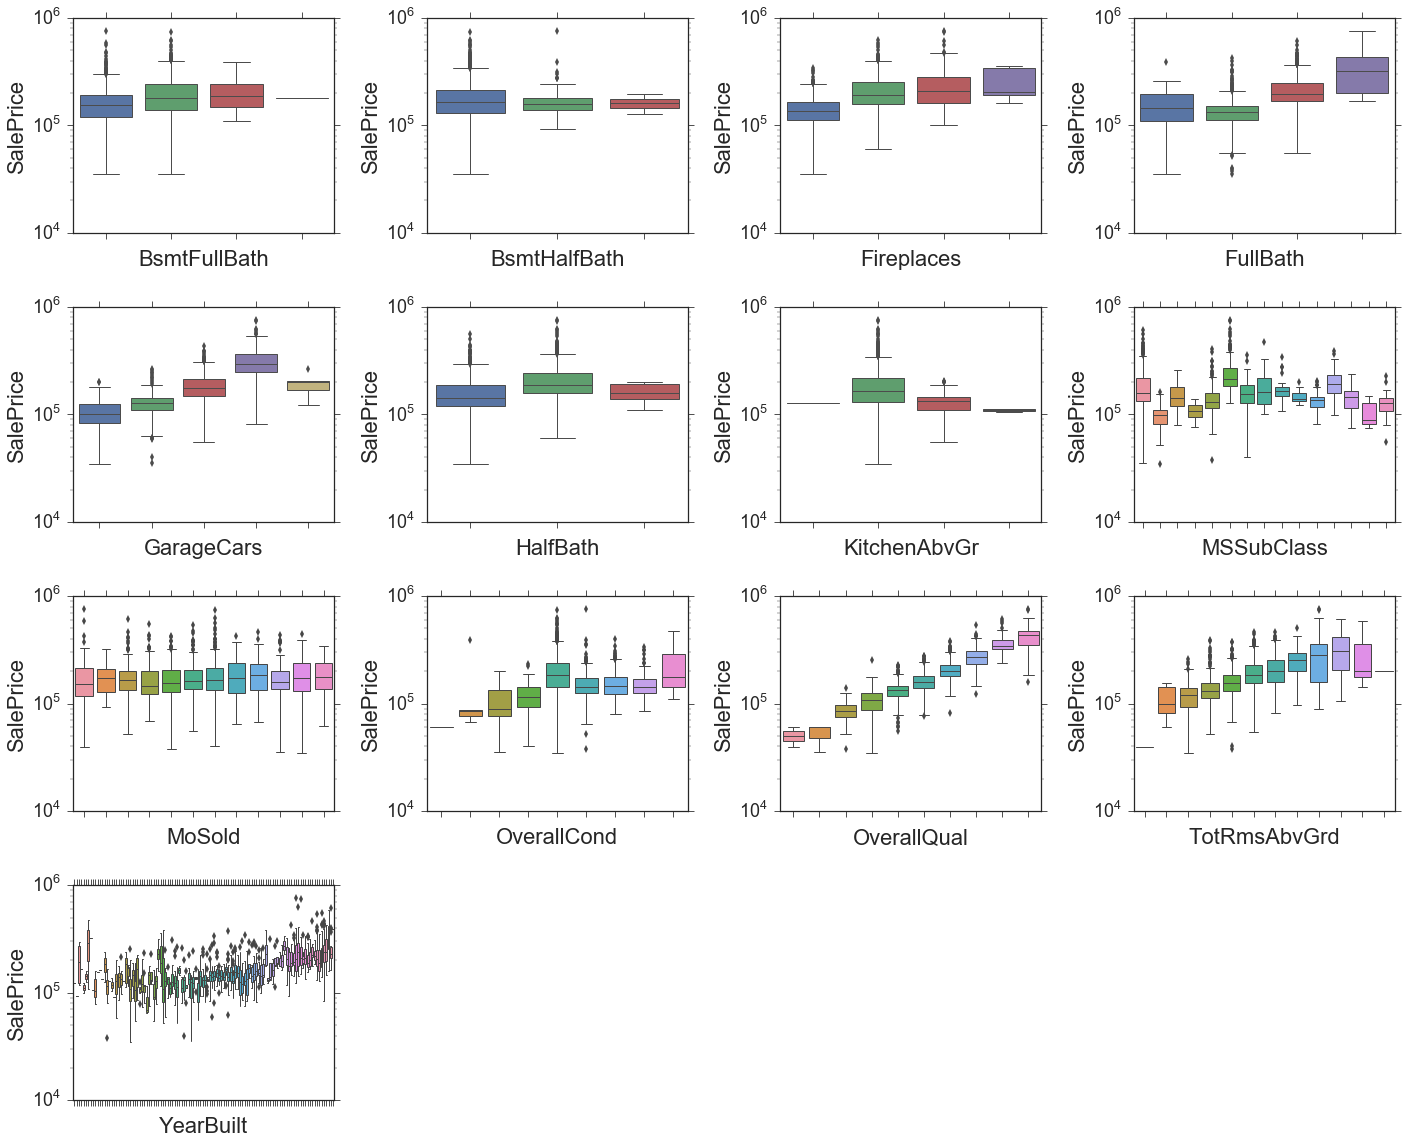

In [52]:
# Discrete features.
sns.set_context("paper", font_scale=2.5, rc={"lines.linewidth": 1.})

discrete_features = sorted(list(set(list(data.columns[(data.dtypes == 'int64') | 
                                                      (data.dtypes == 'float') ][1:-1])) - set(cont_features)))
plt.figure(figsize=(20, 40))

for i, feature in enumerate(discrete_features[1:-1],1):
    if feature not in cont_features:
        plt.subplot(10, 4, i)
        g = sns.boxplot(x=feature, y="SalePrice", data=data)
        g.set(xticklabels=[])
        plt.xticks( rotation=45, fontsize=12)
        plt.semilogy()
        plt.yticks(fontsize=18)
plt.tight_layout()
plt.savefig('DiscreteFeatures.pdf')

In [22]:
# Discrete features.
sns.set_context("poster", font_scale=12, rc={"lines.linewidth": 10.})

category_features = sorted(list(set(list(data.columns[data.dtypes == object][1:-1])) - set(cont_features)))
plt.figure(figsize=(180, 250))

for i, feature in enumerate(category_features[1:-1],1):
    if feature not in cont_features:
        ax1 = plt.subplot(10, 6, i)
        # Determine the order of boxes
        g = sns.boxplot(x=feature, y="SalePrice", data=data)
        plt.xticks( rotation=45, fontsize = 100)
        #plt.yticks(())
        plt.semilogy()
        plt.yticks(fontsize=100)
        g.set(yticks = [], ylabel='')
plt.tight_layout()
plt.subplots_adjust(wspace=0.05, hspace=0.55)

plt.savefig('CategoricalFeatures.pdf')
#columns_noncont = ["MSZoning","LotFrontage", "Neighborhood", "Condition1",
#                   "OverallQual","RoofStyle","OverallCond","ExterQual","Foundation",
#                   "BsmtQual","CentralAir","FullBath", "BedroomAbvGr", "TotRmsAbvGrd","Fireplaces", "MasVnrType",
#                   "KitchenQual","GarageCars","GarageQual","PavedDrive", "Heating", "SaleCondition", "GarageCond"]
#

In [5]:
def pairsplot(df, features):
    g = sns.pairplot(df, x_vars=features, y_vars=["SalePrice"],
             size=5, aspect=.8, kind="reg");
    return g

In [6]:
cat_columns = sorted(data.select_dtypes(['object']).columns)

for column in cat_columns:
    data[column] = data[column].astype('category')

#print data.dtypes[data.dtypes == 'category']
#print cat_columns
data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)

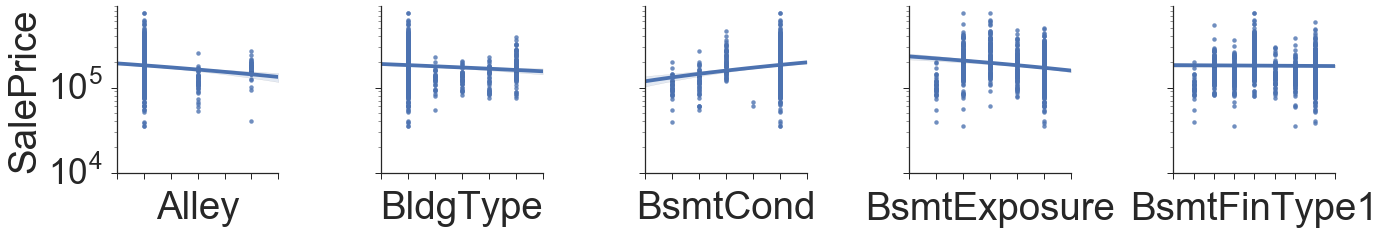

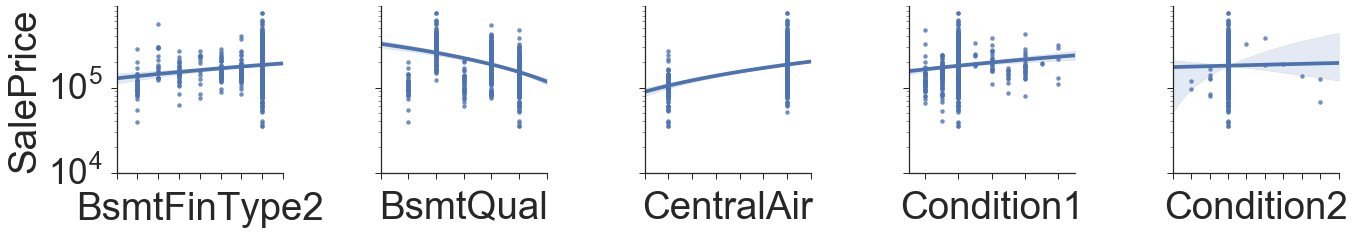

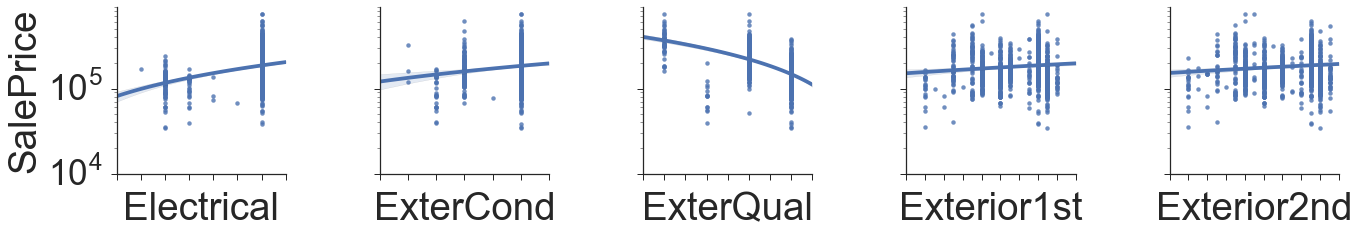

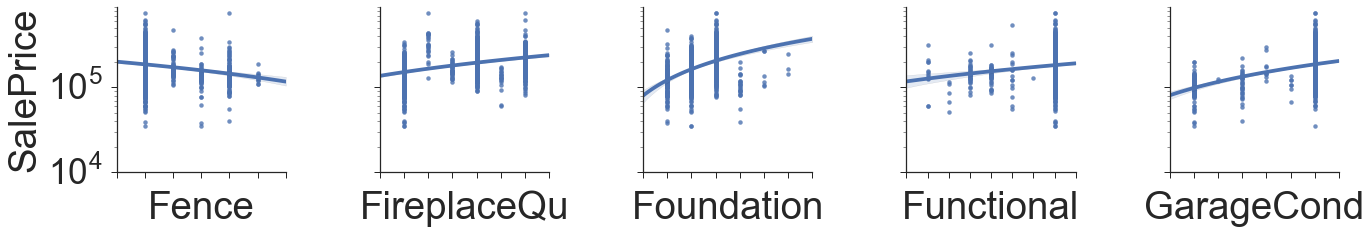

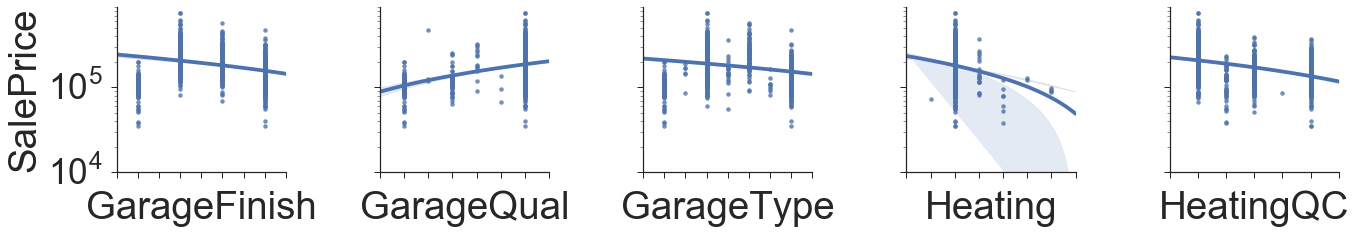

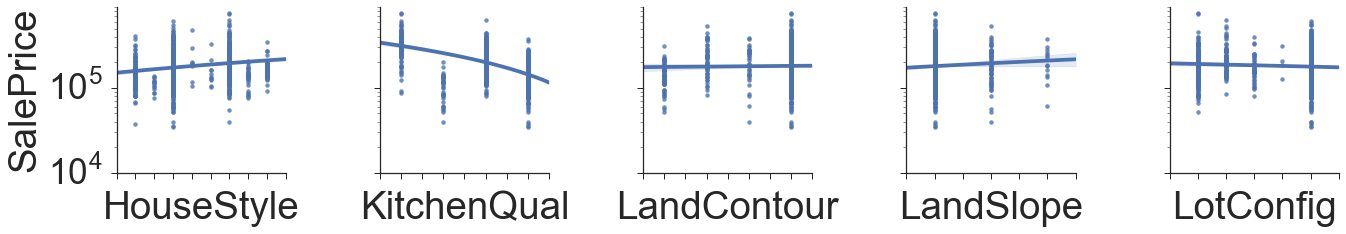

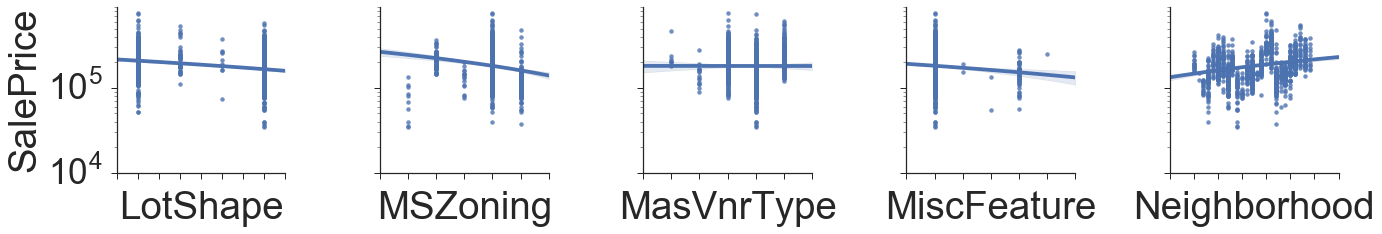

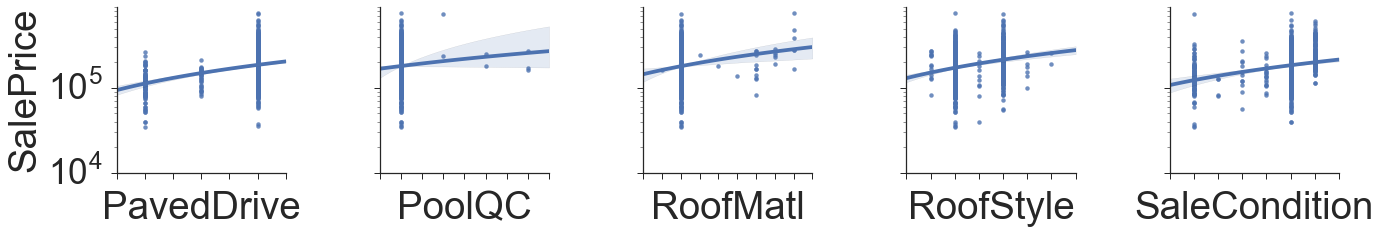

In [7]:
for j in range(0, len(cat_columns)-5, 5):
    g = pairsplot(data, cat_columns[j:j+5])
    plt.ylim(1e4,)
    g.set(xticklabels=[])
    plt.semilogy()

#pairsplot(data_continuous, data_continuous.columns[14:19])

columns_noncont = ["MSZoning", "Neighborhood", "Condition1",
                   "OverallQual","RoofStyle","OverallCond","ExterQual","Foundation", "HeatingQC", "HouseStyle",
                   "BsmtQual","CentralAir","FullBath", "BedroomAbvGr", "TotRmsAbvGrd","Fireplaces", "MasVnrType",
                   "KitchenQual","GarageCars","GarageQual","PavedDrive", "Heating", "SaleCondition", "GarageCond"]


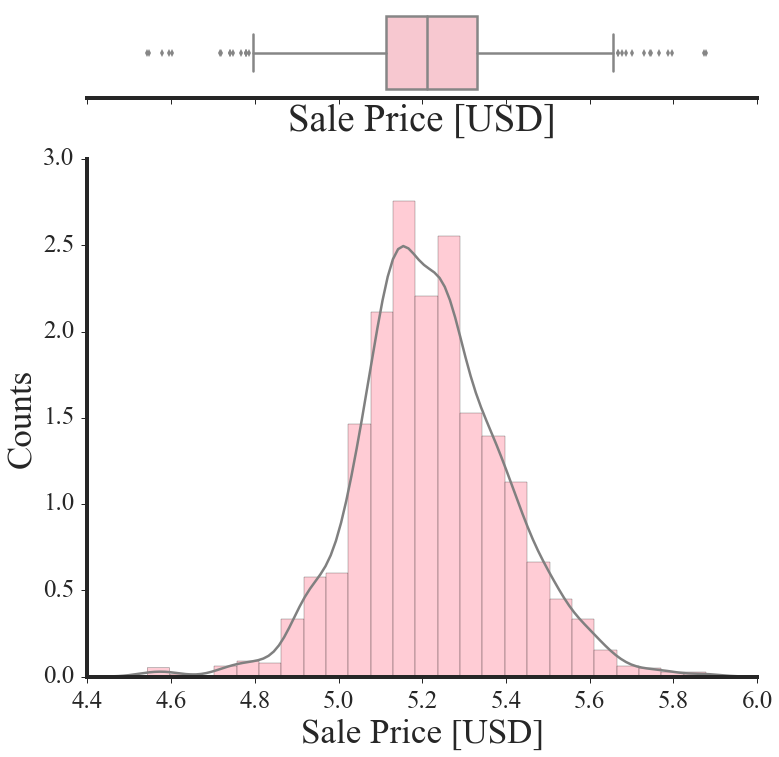

In [29]:
#define plotter
minorLocatorx   = AutoMinorLocator(10)
minorLocatory   = AutoMinorLocator(4)
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 
matplotlib.rcParams['axes.linewidth'] = 2.
plt.rcParams['axes.linewidth'] = 4
plt.rc('font', family='serif')
plt.rc('font', serif='Times New Roman') 
fig_size = plt.rcParams["figure.figsize"]
plt.rcParams["figure.figsize"] = fig_size
fig_size[0] = 12
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(np.log10(data.SalePrice), ax=ax_box, color='Pink');
sns.distplot(np.log10(data.SalePrice), ax=ax_hist, color='grey', norm_hist=False, bins=25, hist_kws={'alpha': 0.8, 'color': 'pink'});

ax_box.set(yticks=[], xlabel='Sale Price [USD]')
sns.despine(ax=ax_hist);
sns.despine(ax=ax_box, left=True)

plt.xlabel('Sale Price [USD]', fontsize=35)
plt.ylabel('Counts',  fontsize=35);
#plt.xlim(1e4, 1e6);
plt.yticks(fontsize=25);
plt.xticks(fontsize=25);#, format)
#plt.semilogx();
plt.savefig('SalePriceStats.pdf', dpi=400)